In [17]:
%load_ext autoreload
%autoreload 2

from post_process.betti_feature_compare import GetFeatureCared, CompareFeatureCared


# torch下的增强

现在依然使用的是`torch`里面的增强，但是扩大了范围，现在关心的只有`TDA`的情况，同样是输出了每一个隐藏层的情况。

In [18]:
# %load_ext autoreload
# %autoreload 2

from post_process.betti_feature_compare import GetFeatureCared, CompareFeatureCared
from post_process.val_acc_compare import CompareValAcc, CompareBOF
from itertools import product

layer_care_options = [True, False]
feature2get_options = ["max_death",  "all_bars_survive_time_sum", "death_len"]
l_distance_options = ['L1', 'L2']
betti_number_dim_options = ['0th', '1th']

# 使用product函数生成所有可能的组合
combinations = list(product(l_distance_options, feature2get_options,   betti_number_dim_options, layer_care_options))


## Angle

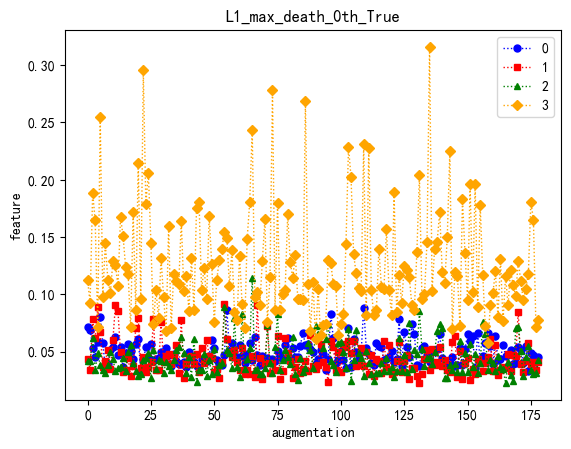

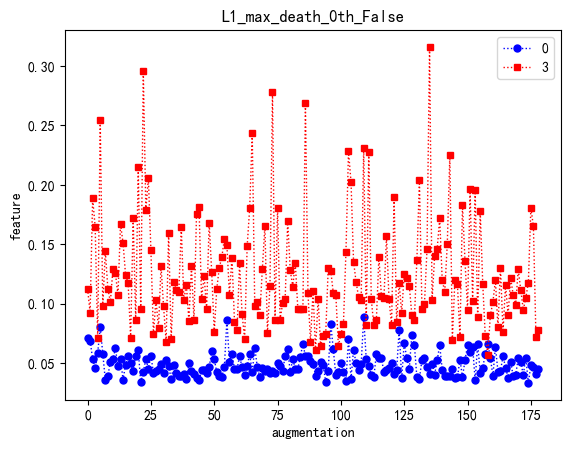

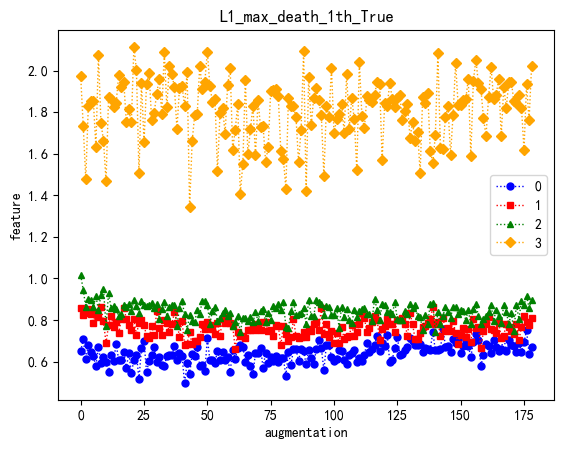

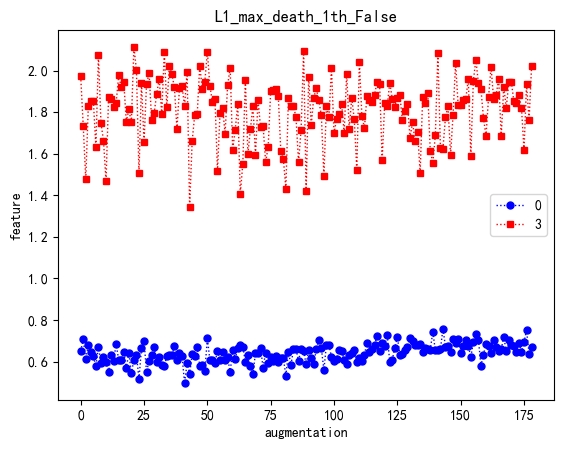

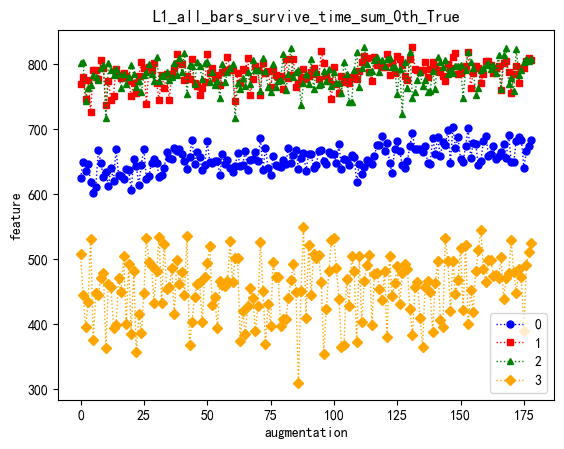

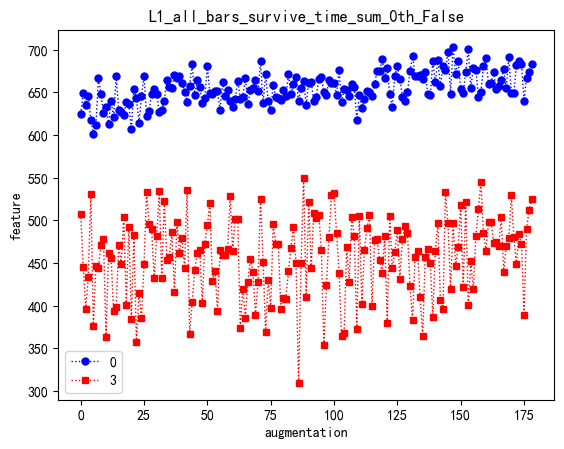

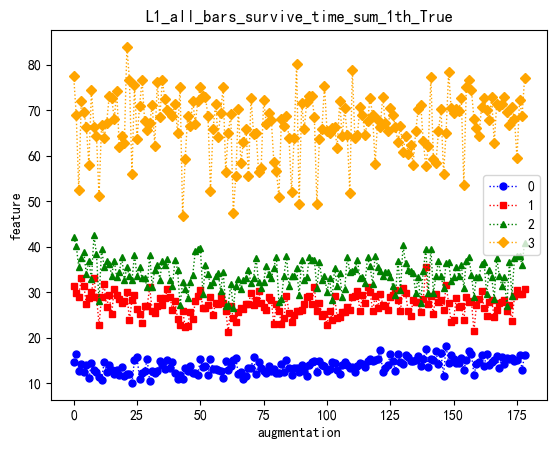

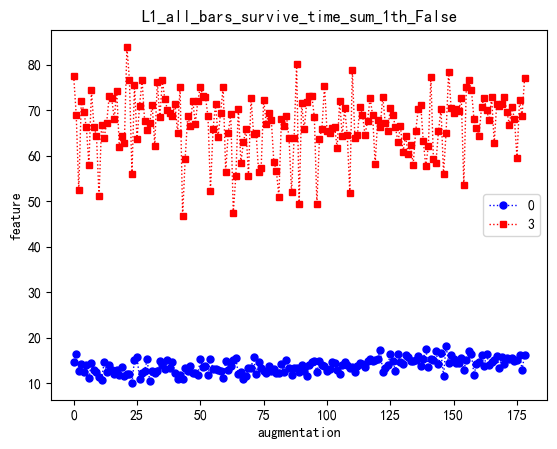

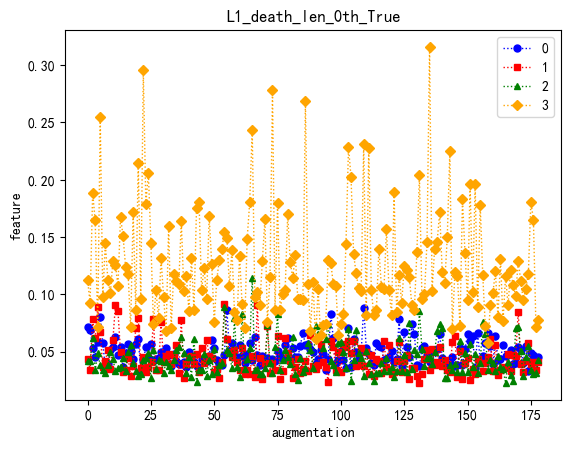

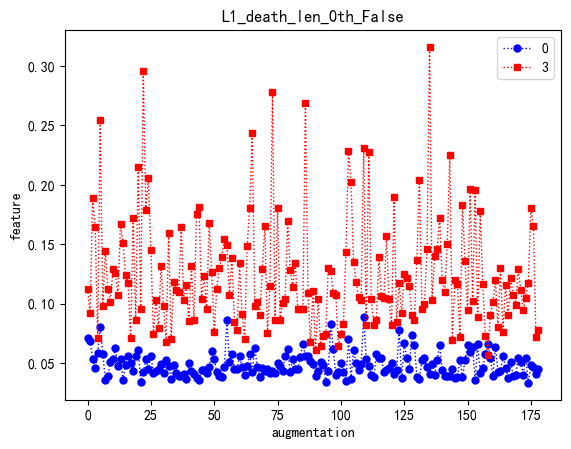

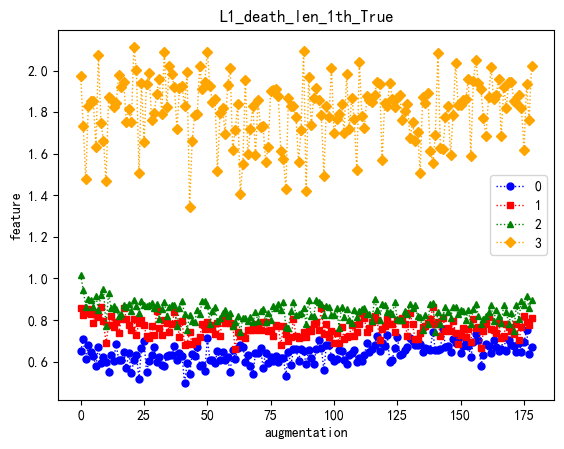

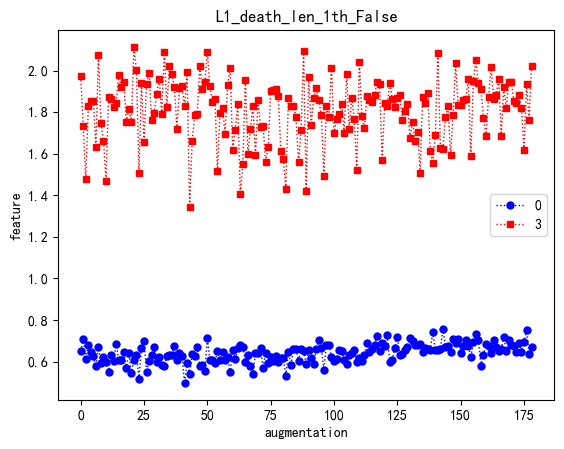

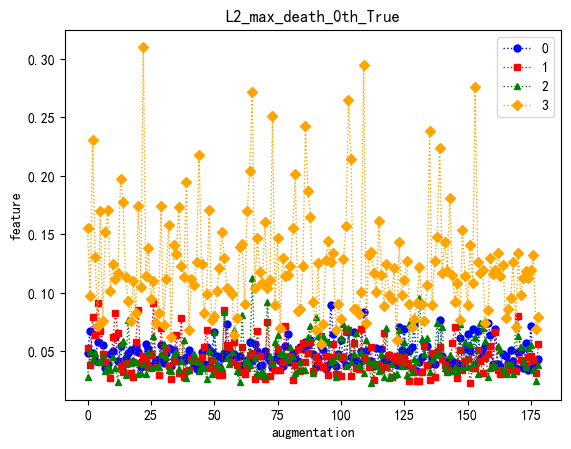

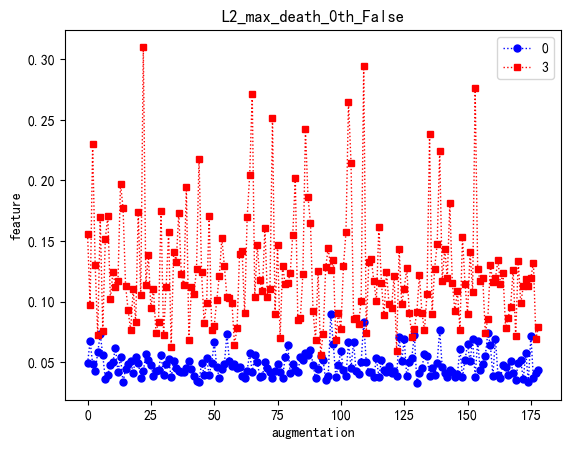

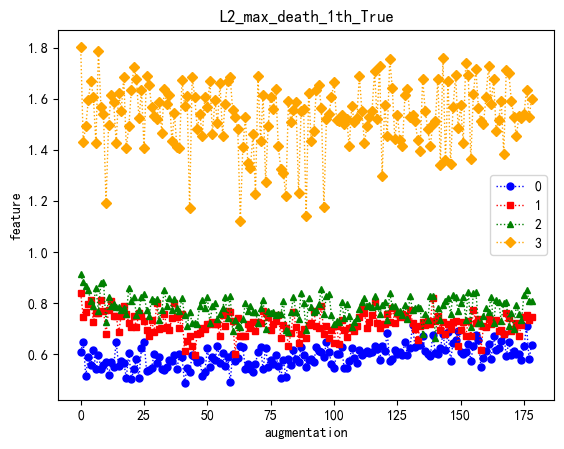

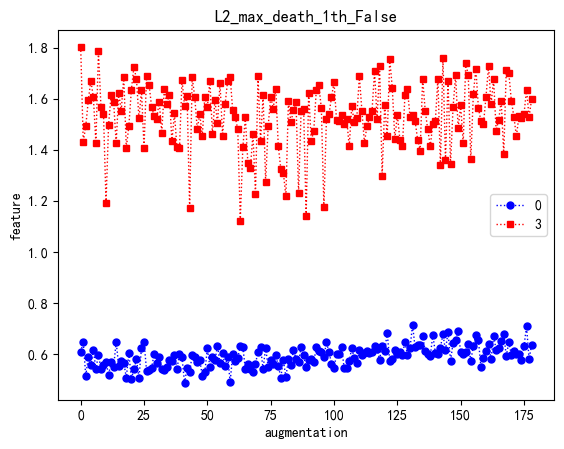

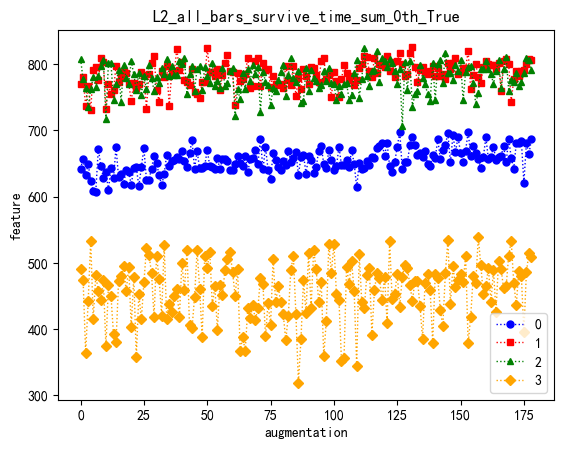

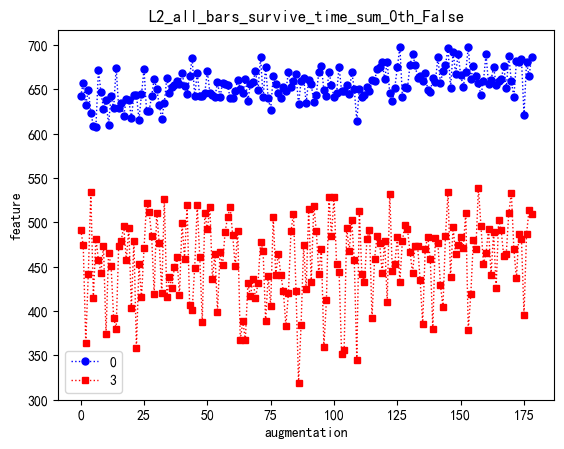

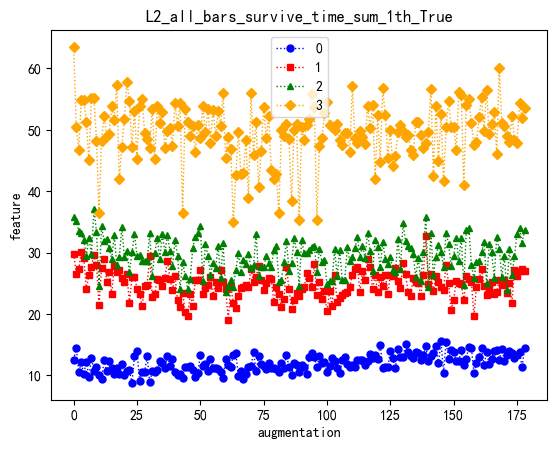

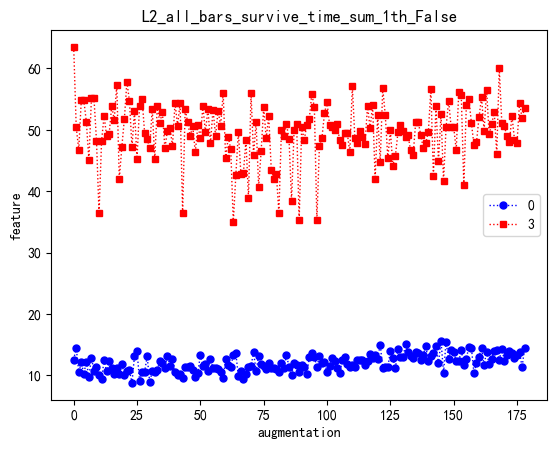

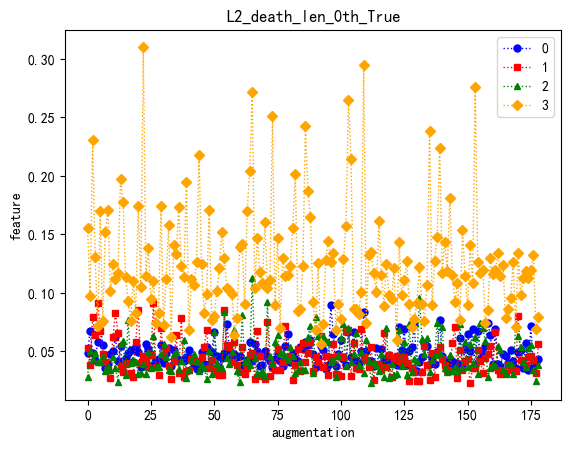

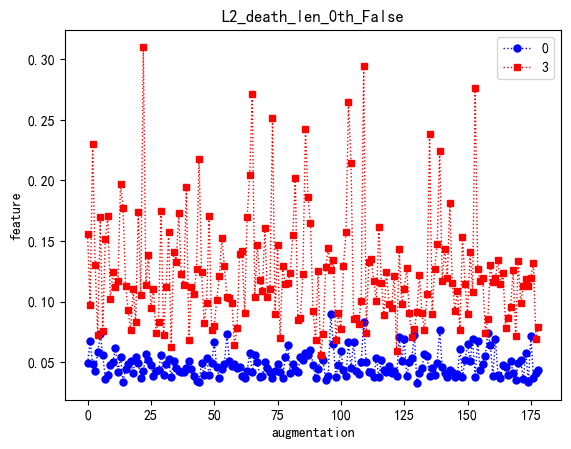

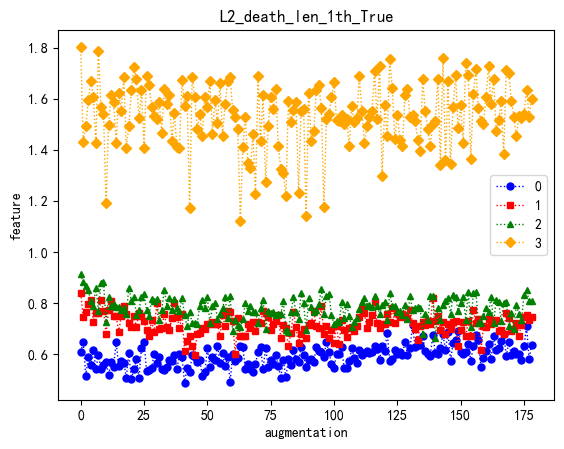

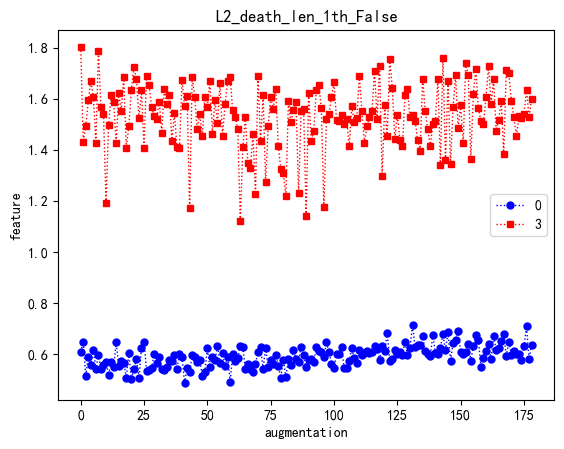

In [27]:
folder = r".\test_rescale_1207\angle_torch\MLP"  # 替换为实际文件夹路径，这里是保存路径
pkl_filename = 'betti_features.pkl'  # 替换为实际的 pkl 文件名

# 创建CompareFeatureCared类的实例，并对每个组合进行操作
for combination in combinations:
    comp = CompareFeatureCared(folder, pkl_filename, *combination, aug_type="angle")

# test_val_acc = CompareValAcc(file_path=folder, target_pkl="best_test_acc.pkl")
# test_BOF = CompareBOF(file_path=folder, target_pkl="BOF.pkl", aug_name='angle', net_name='LeNet')

## Scale

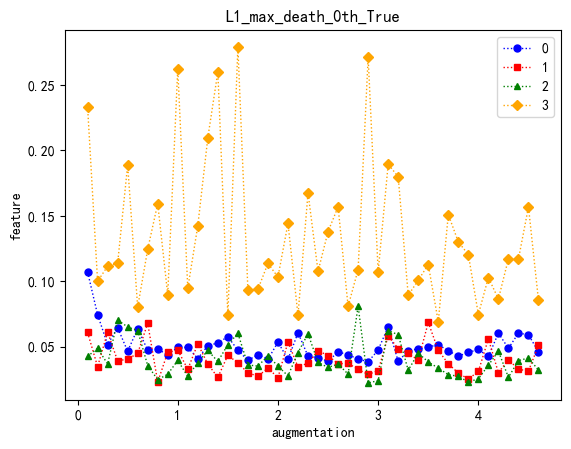

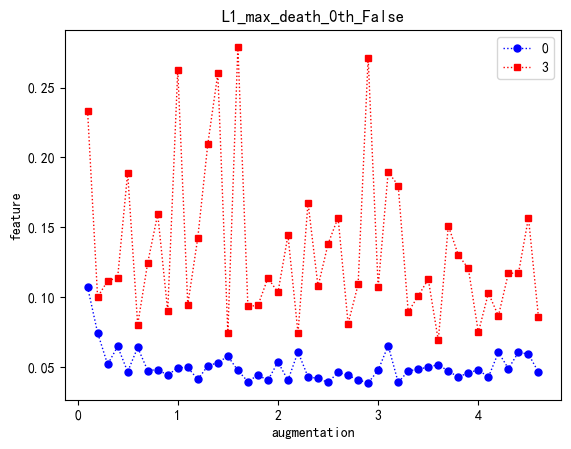

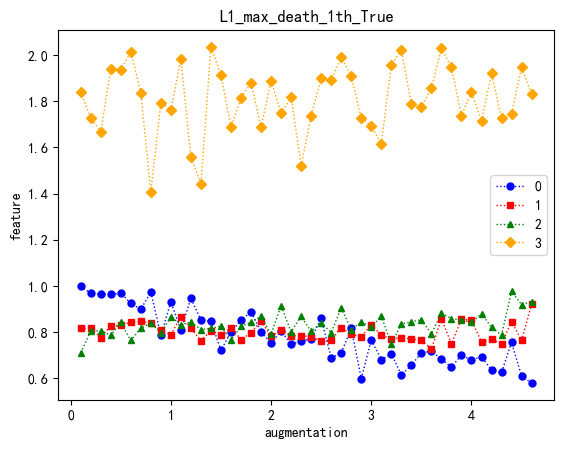

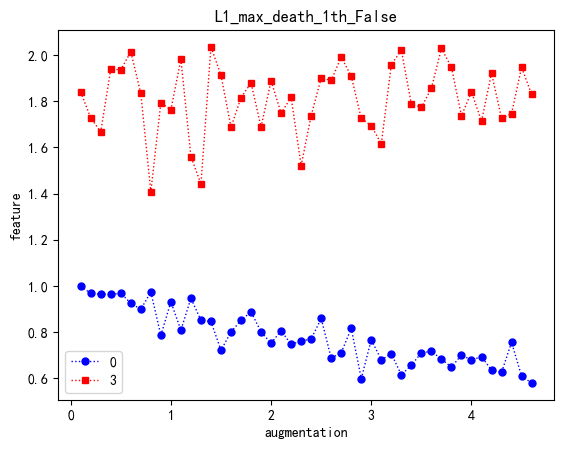

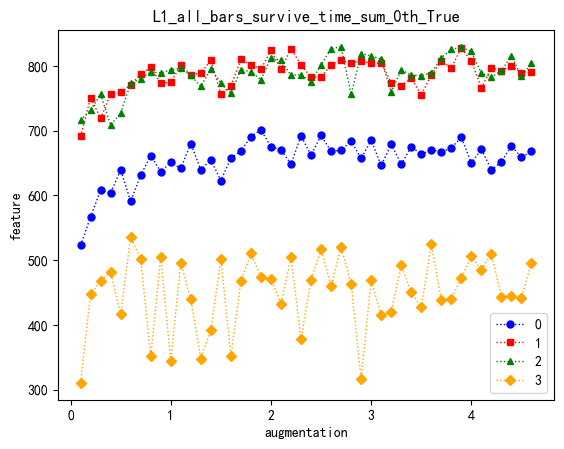

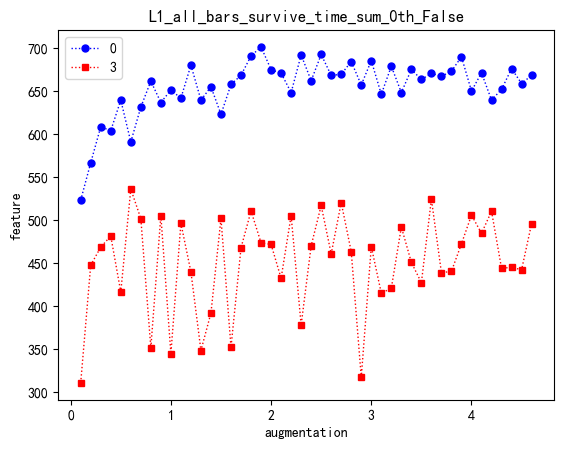

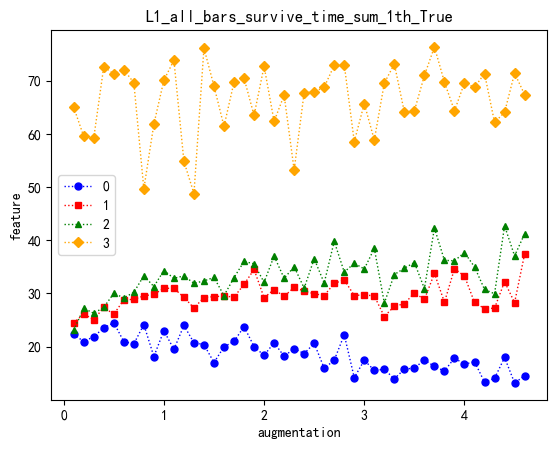

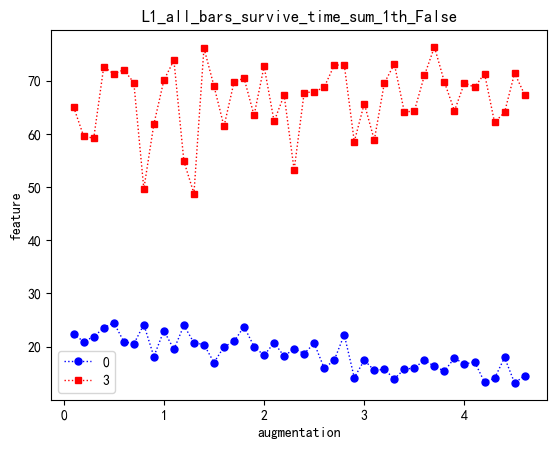

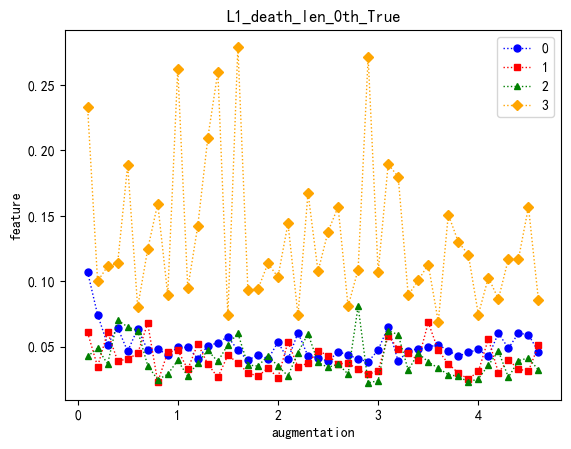

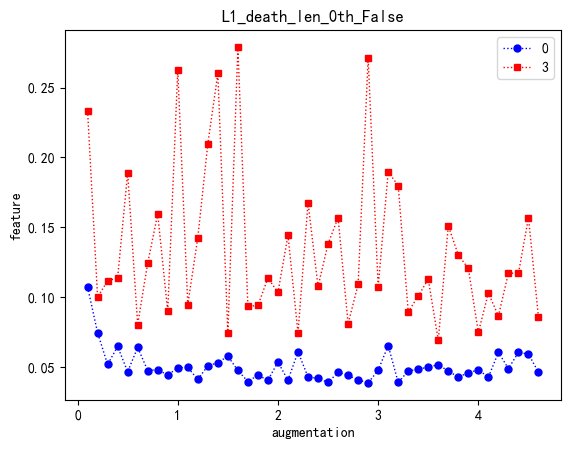

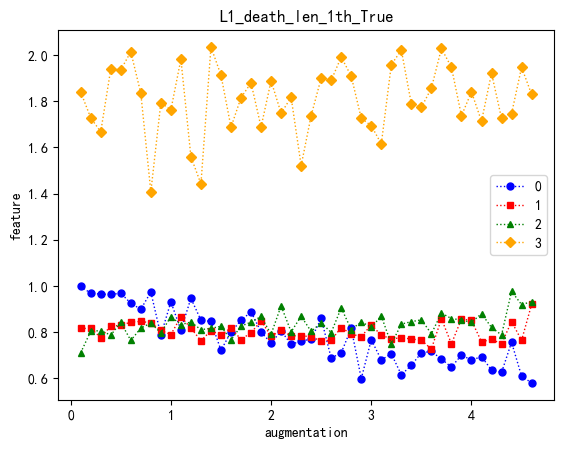

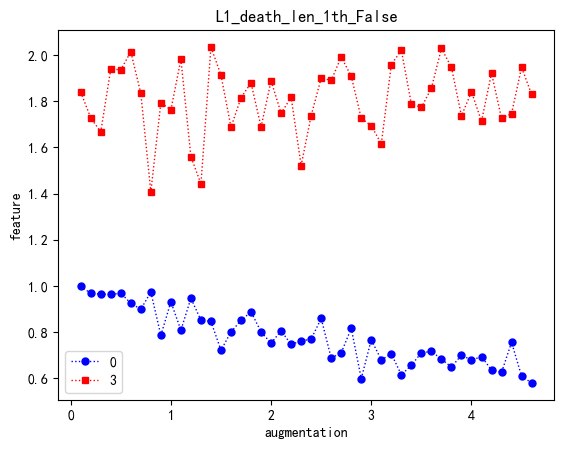

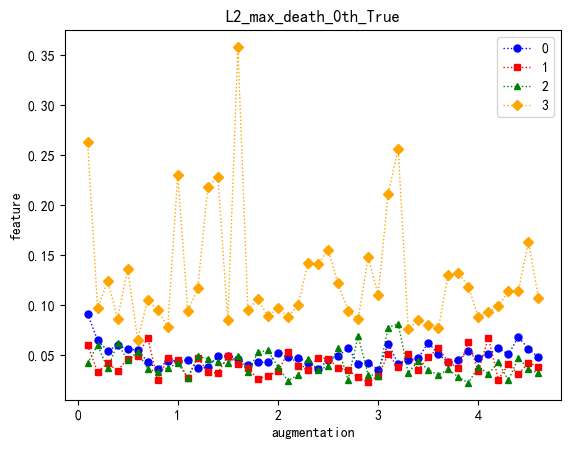

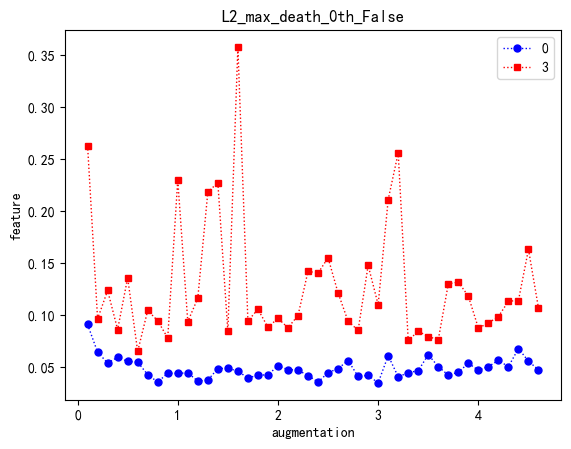

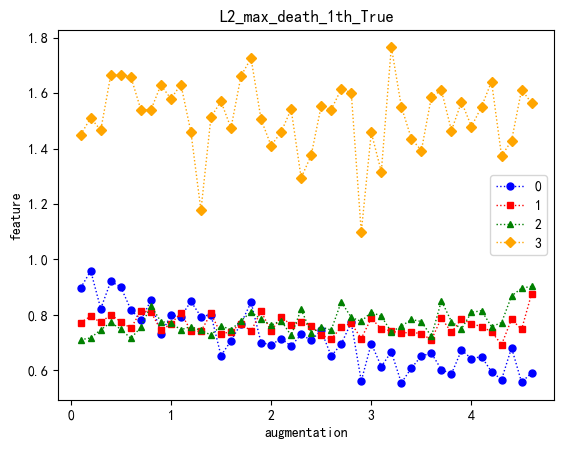

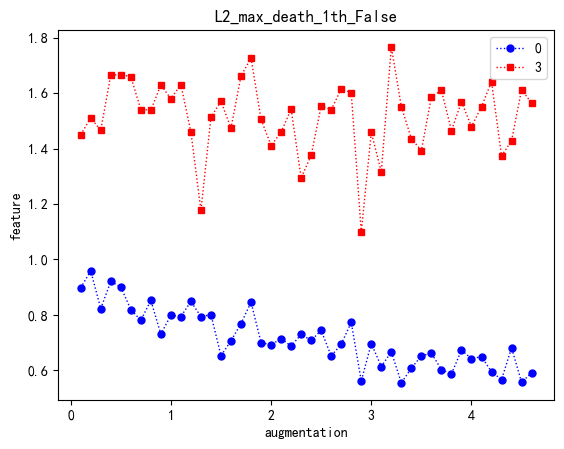

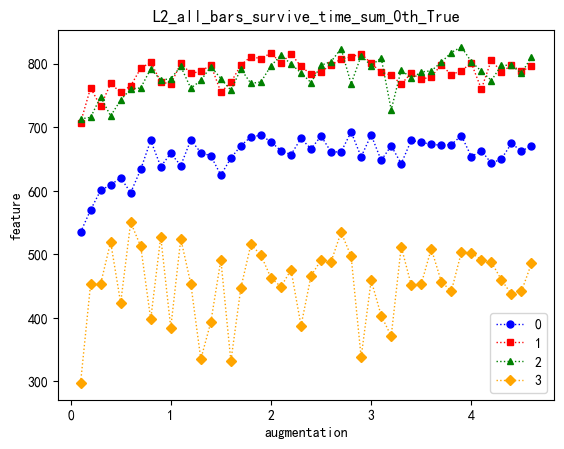

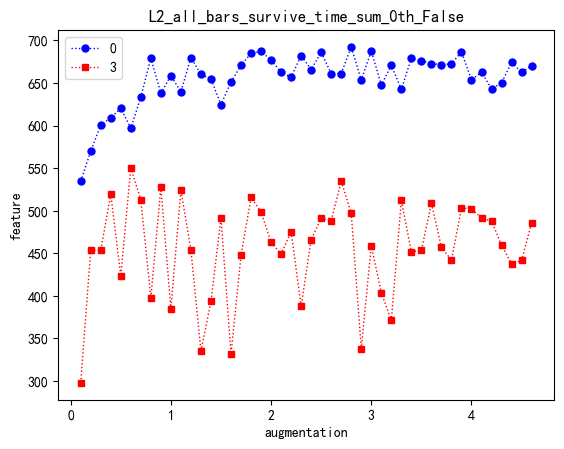

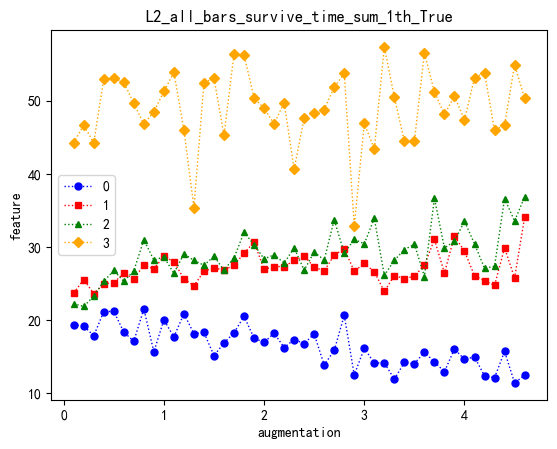

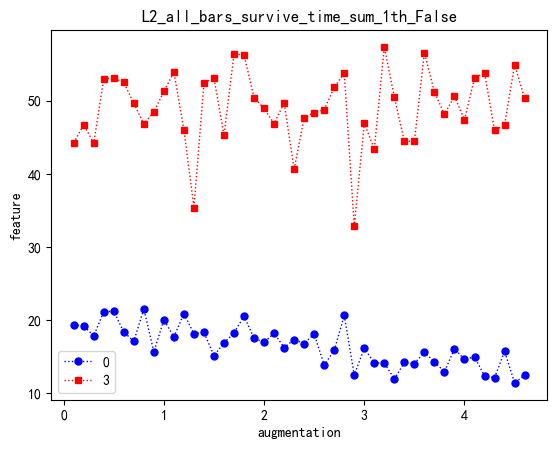

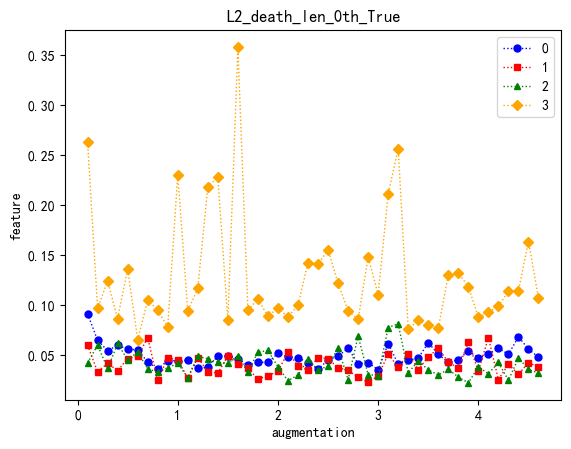

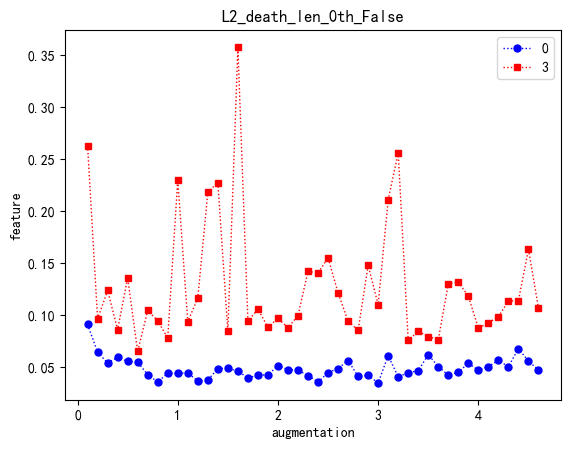

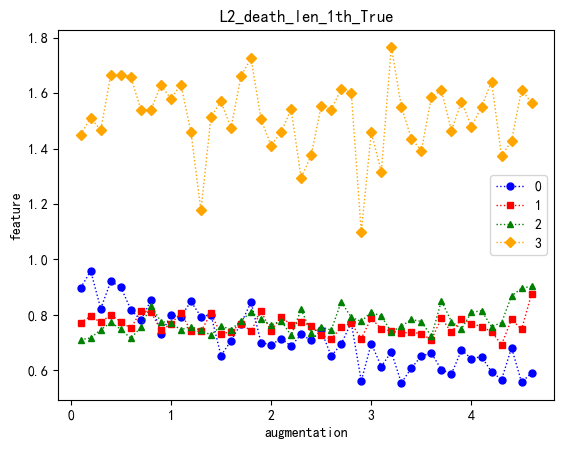

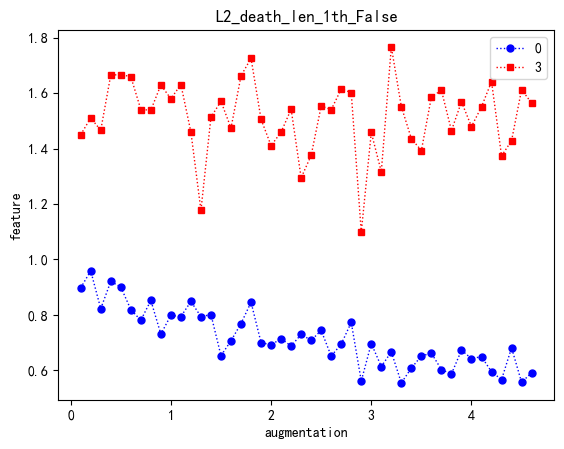

In [23]:
folder = r".\test_rescale_1207\scale_torch\MLP"  # 替换为实际文件夹路径，这里是保存路径
pkl_filename = 'betti_features.pkl'  # 替换为实际的 pkl 文件名

# 创建CompareFeatureCared类的实例，并对每个组合进行操作
for combination in combinations:
    comp = CompareFeatureCared(folder, pkl_filename, *combination, aug_type="scale")

# test_val_acc = CompareValAcc(file_path=folder, target_pkl="best_test_acc.pkl")
# test_BOF = CompareBOF(file_path=folder, target_pkl="BOF.pkl", aug_name='angle', net_name='LeNet')

# albumentations下的增强



## Angle

现在使用了`albumentations`下的增强，具体实现如下：

```python
import albumentations as A
from albumentations.pytorch import ToTensorV2
from torchvision import transforms
import torchvision

# 定义 Albumentations 的增强函数
train_transform = A.Compose([
    A.HorizontalFlip(p=0.5),  # 水平翻转
    A.RandomBrightnessContrast(p=0.2),  # 随机亮度和对比度
    A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),  # 标准化
    ToTensorV2()  # 转换为 PyTorch 的 Tensor 格式
])

# 加载 CIFAR-10 数据集并应用增强函数
trainset = torchvision.datasets.CIFAR10(root='data/', train=True, download=True,
                                        transform=transforms.Compose([
                                            lambda img: train_transform(image=np.array(img))['image']
                                        ]))

```

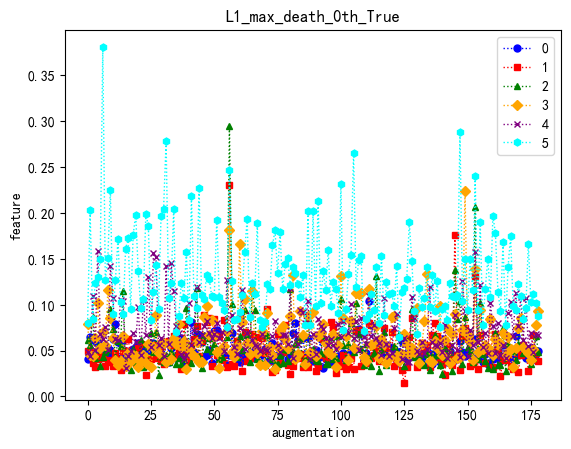

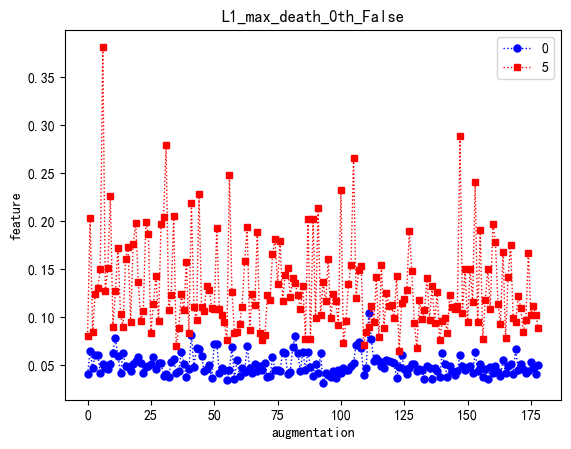

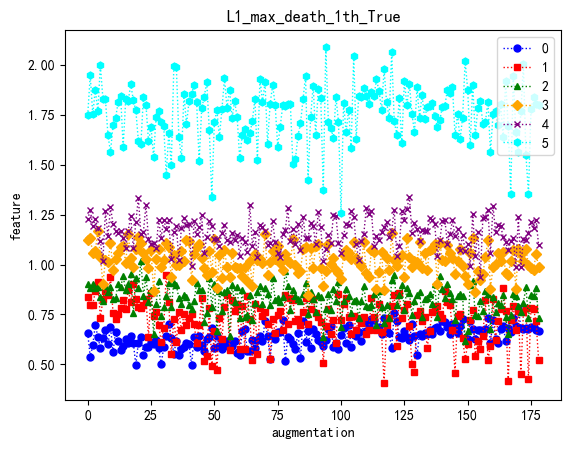

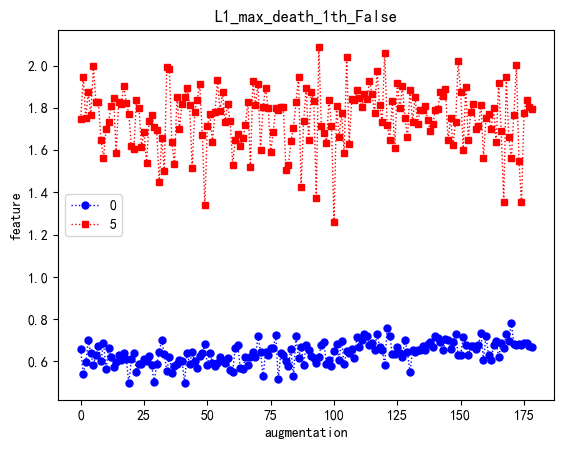

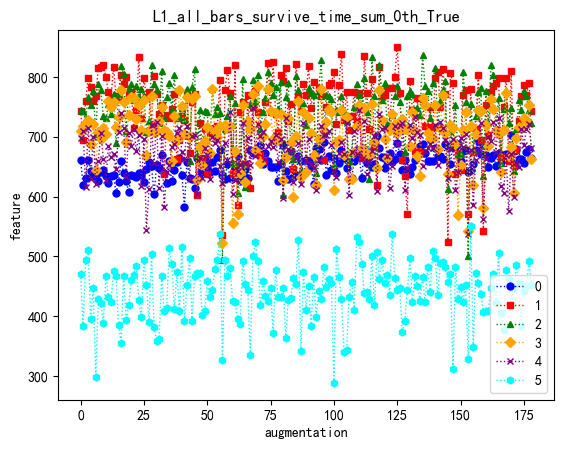

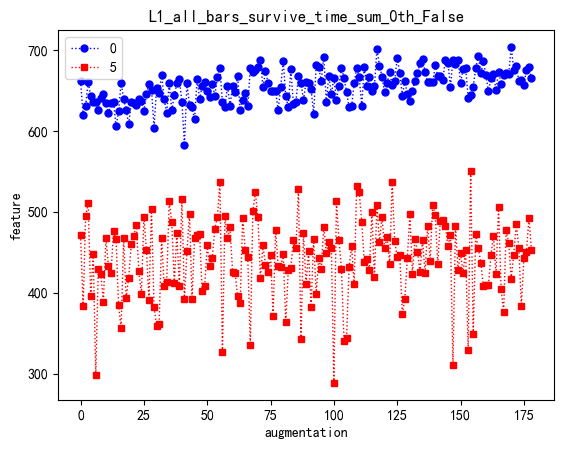

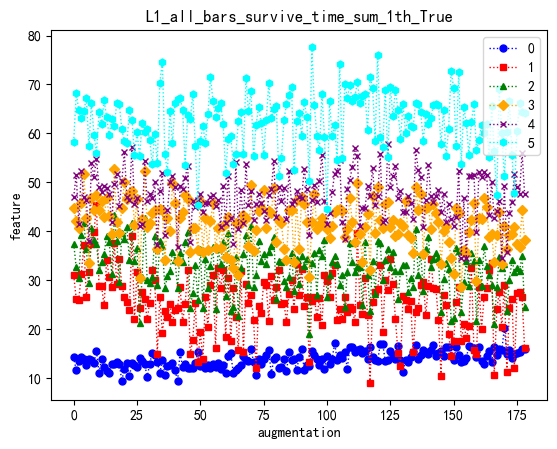

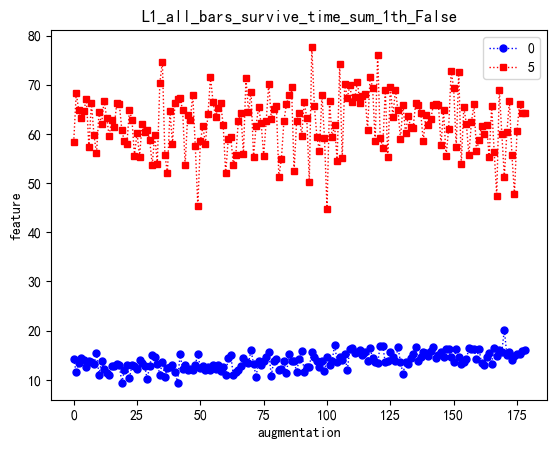

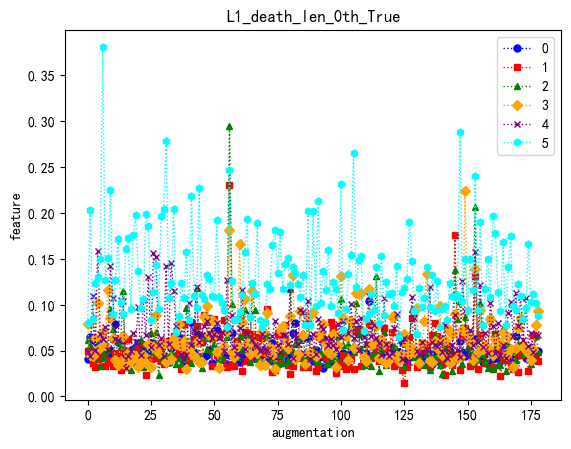

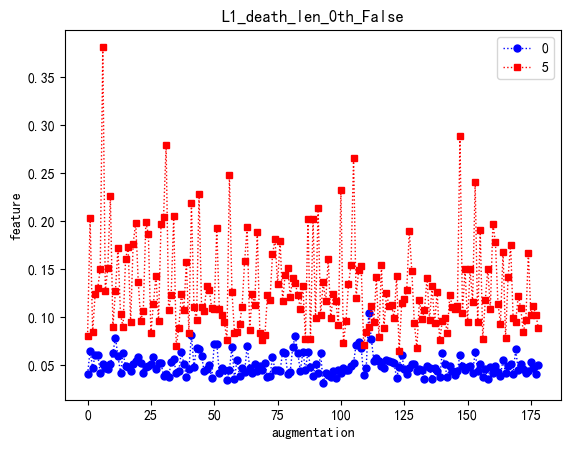

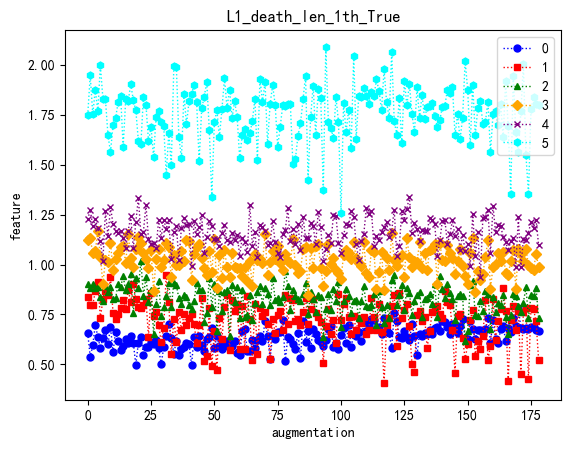

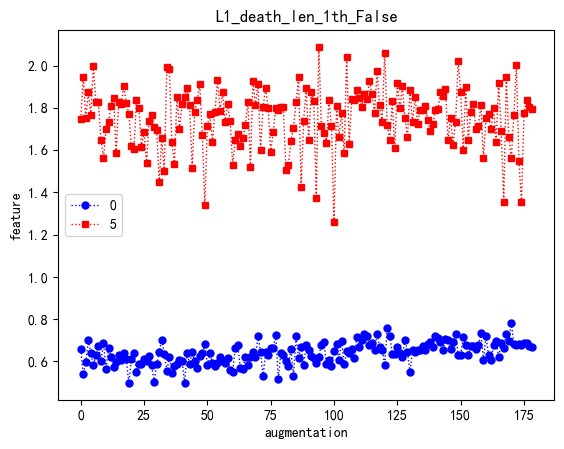

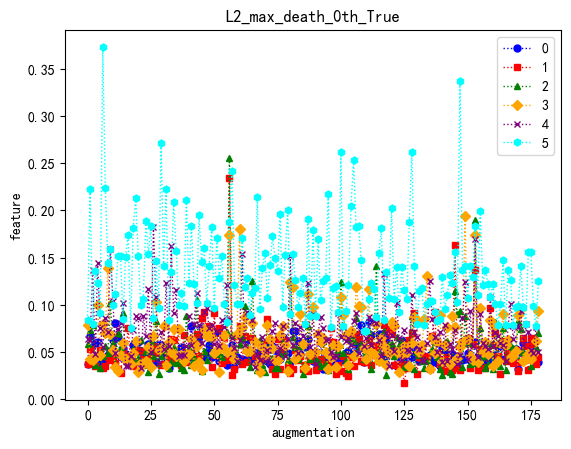

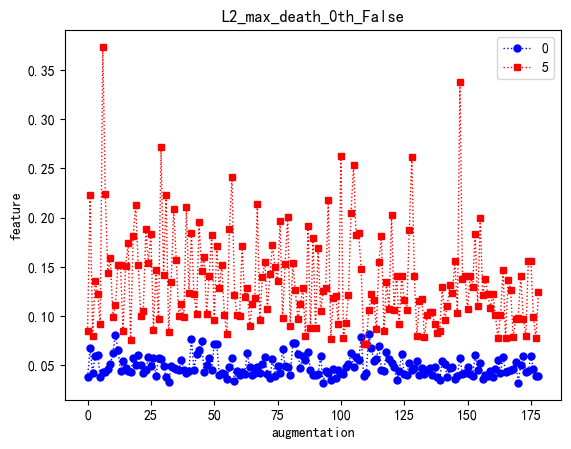

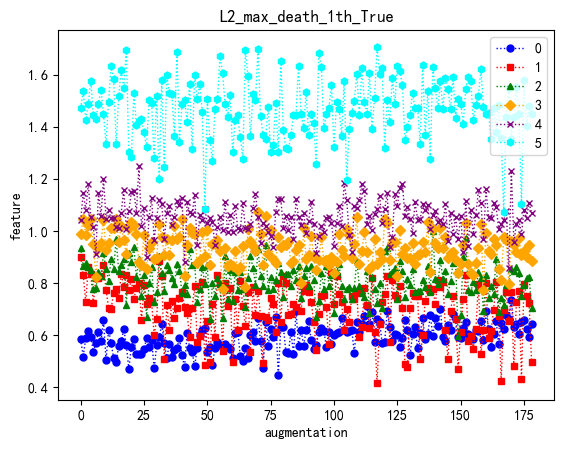

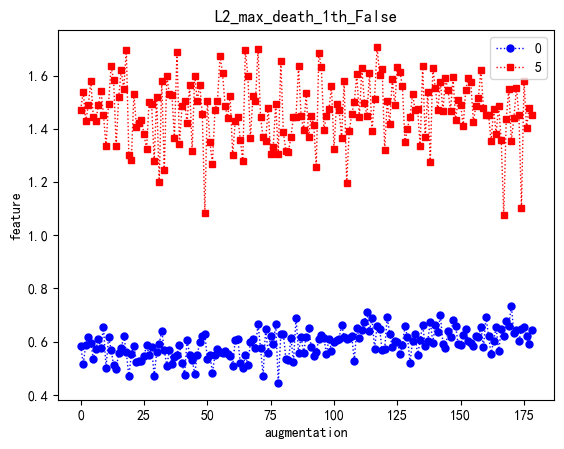

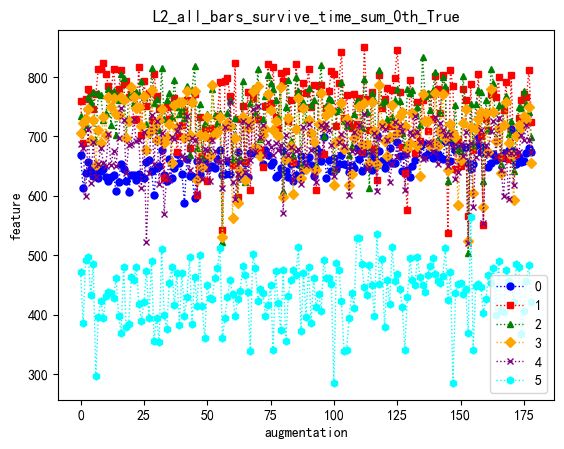

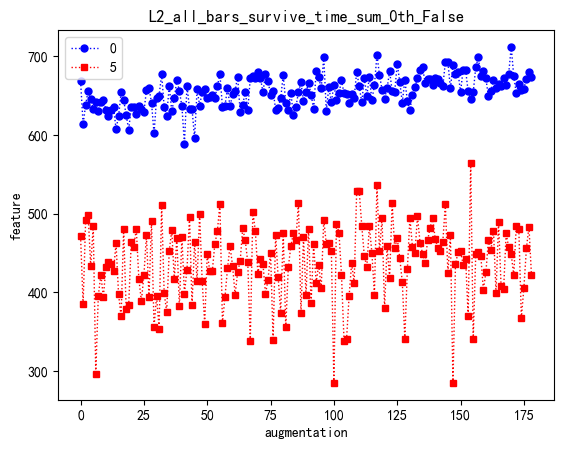

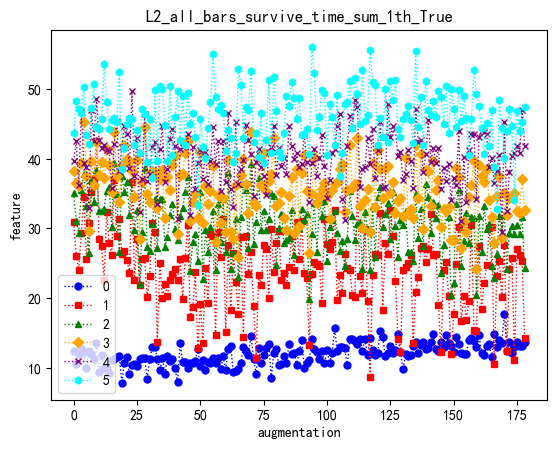

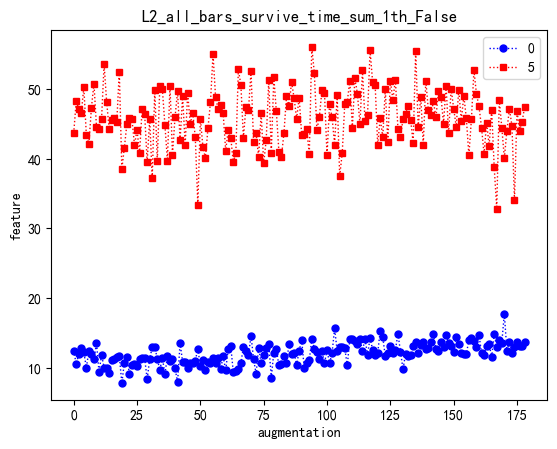

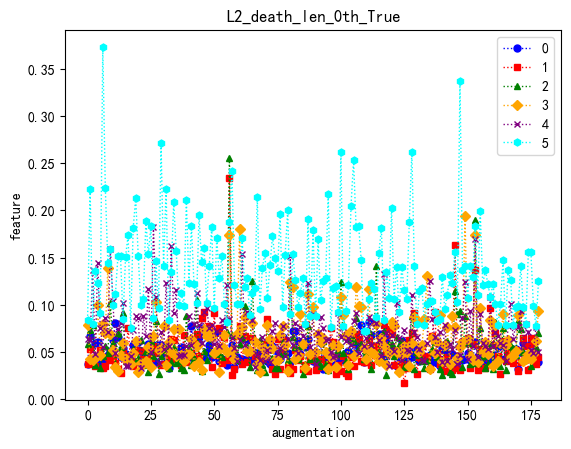

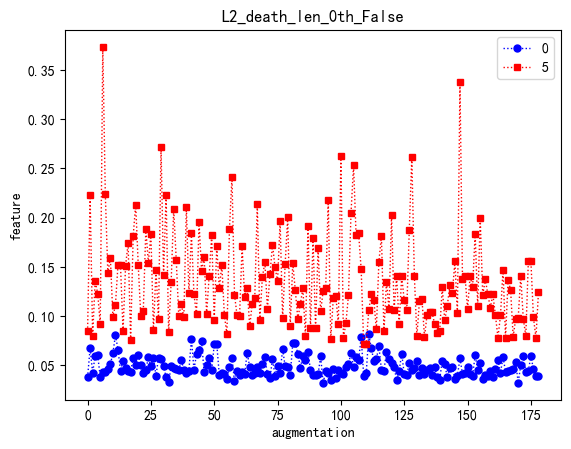

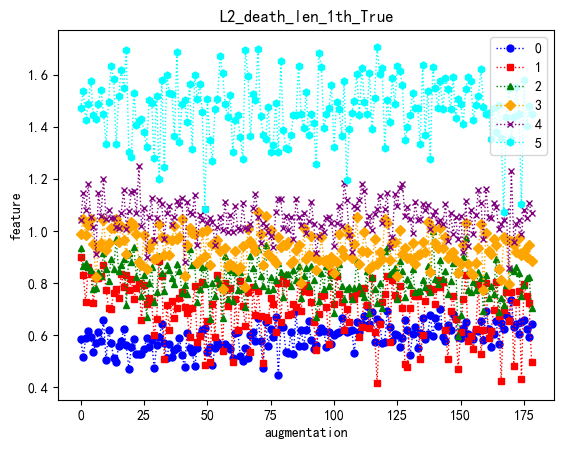

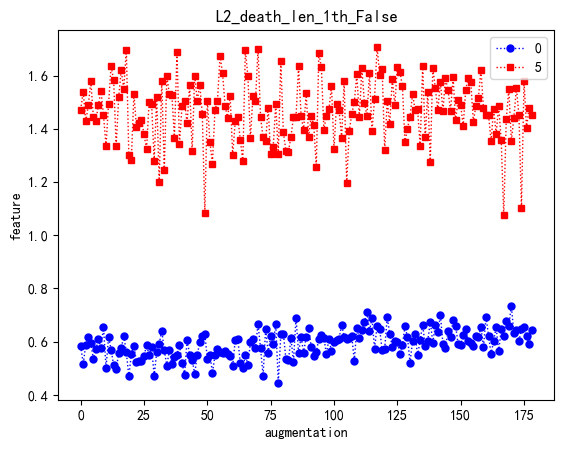

In [28]:
folder = r".\test_rescale_1207\angle_albumentation\LeNet"  # 替换为实际文件夹路径，这里是保存路径
pkl_filename = 'betti_features.pkl'  # 替换为实际的 pkl 文件名

# 创建CompareFeatureCared类的实例，并对每个组合进行操作
for combination in combinations:
    comp = CompareFeatureCared(folder, pkl_filename, *combination, aug_type="angle")

# test_val_acc = CompareValAcc(file_path=folder, target_pkl="best_test_acc.pkl")
# test_BOF = CompareBOF(file_path=folder, target_pkl="BOF.pkl", aug_name='angle', net_name='LeNet')

## Scale

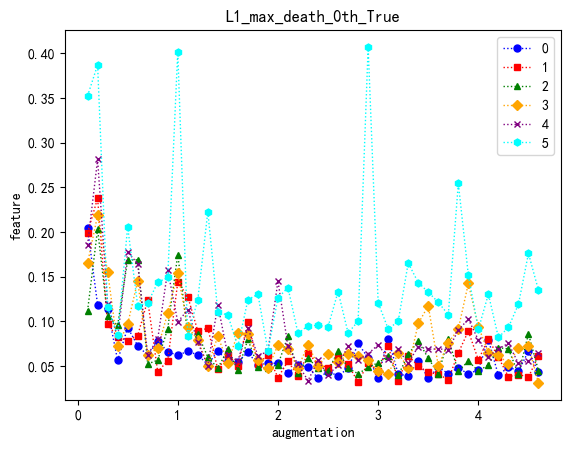

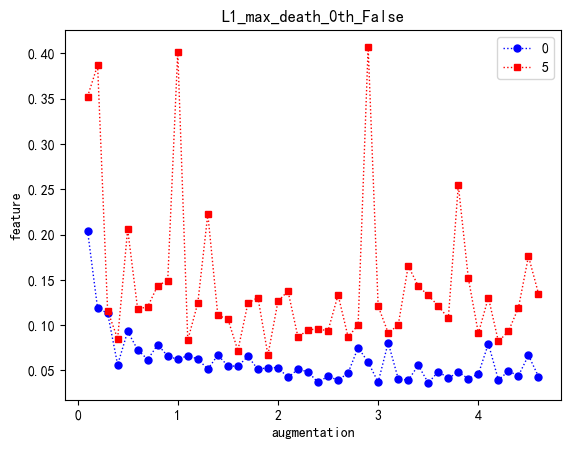

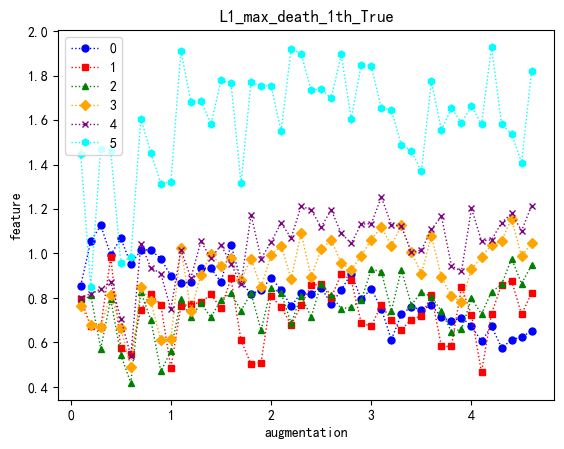

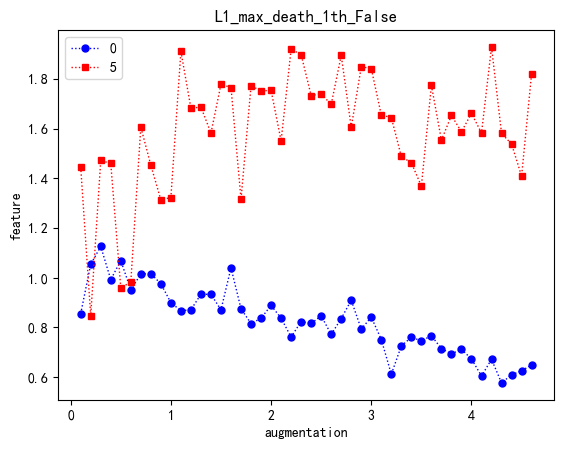

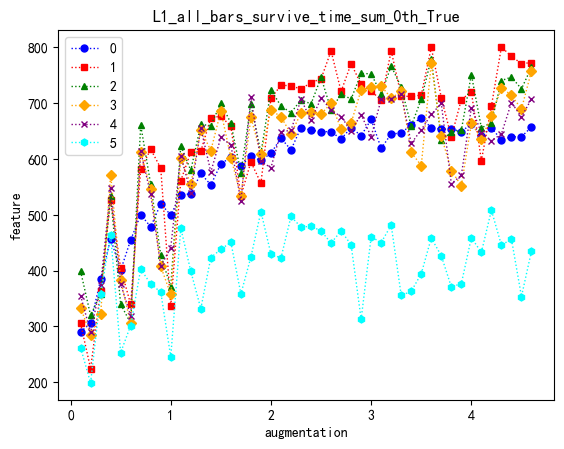

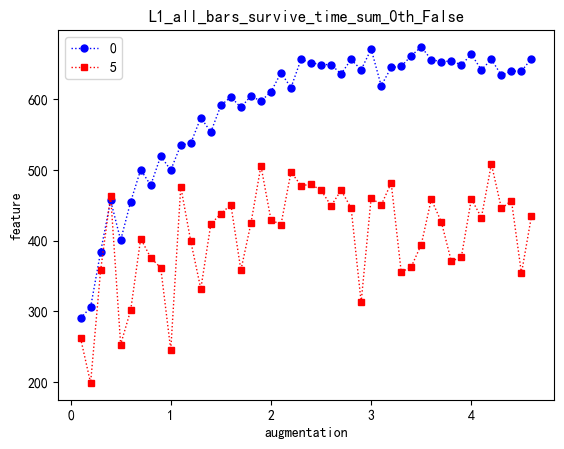

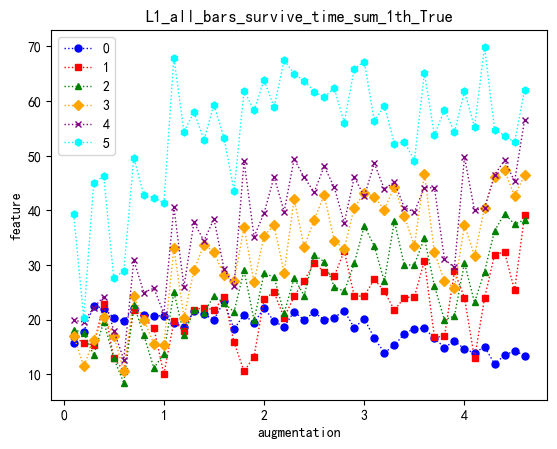

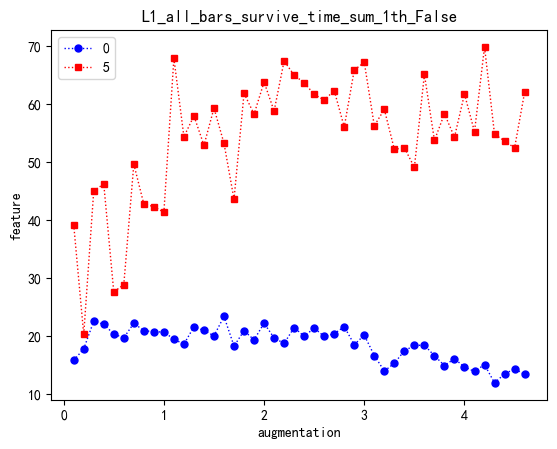

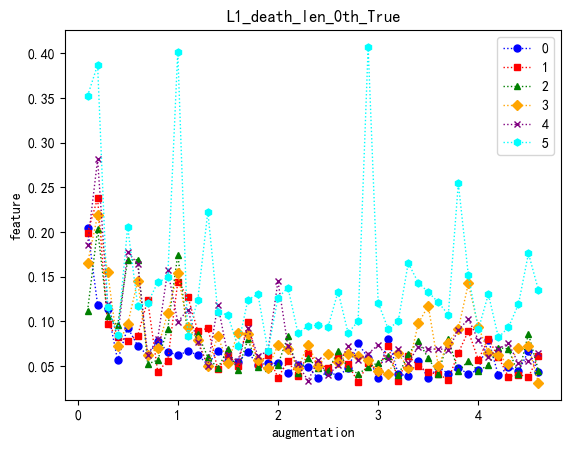

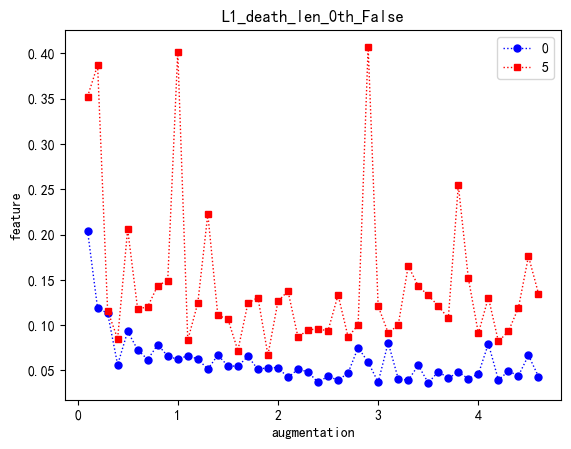

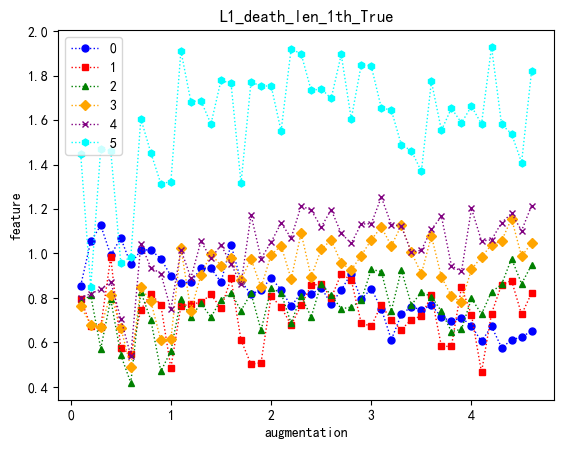

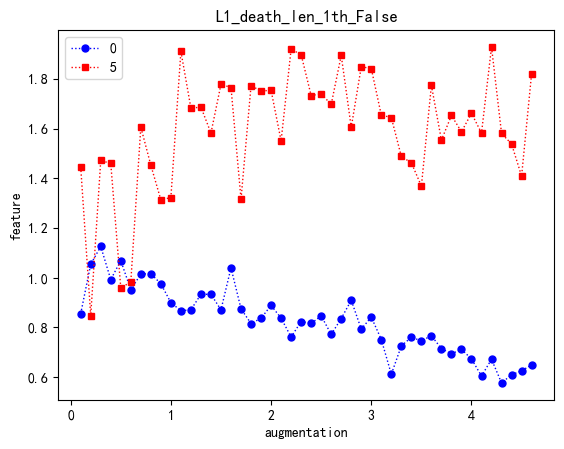

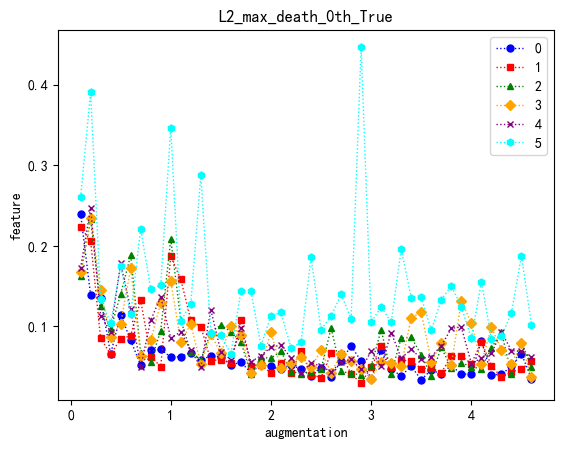

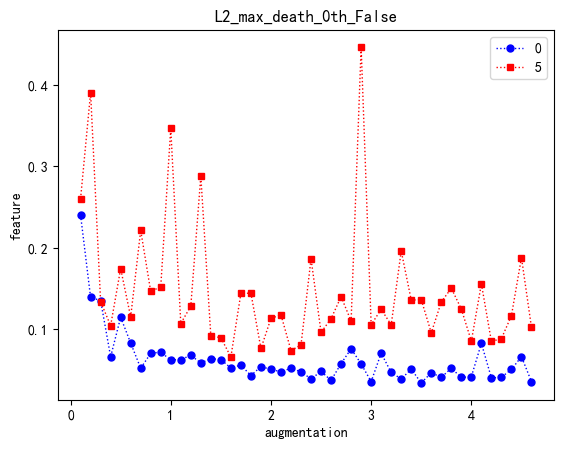

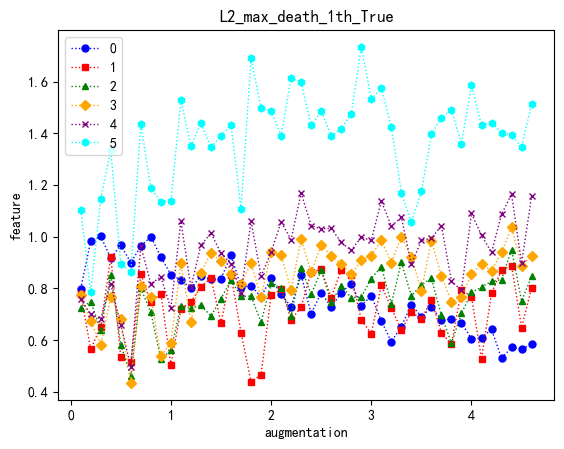

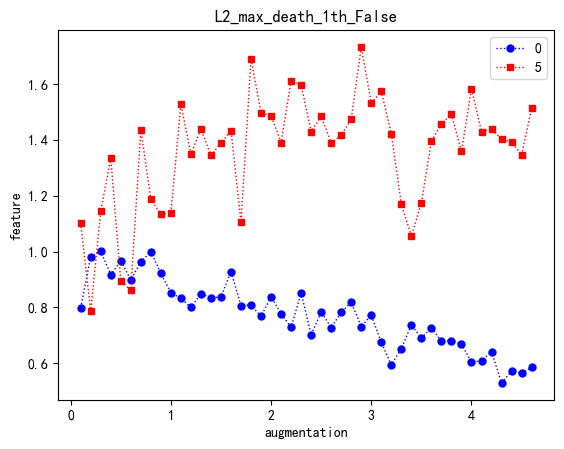

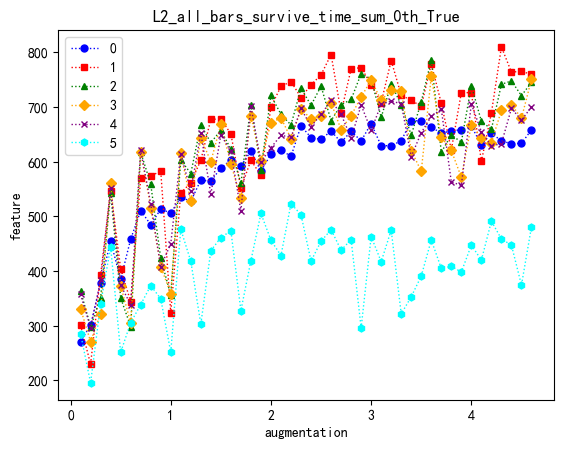

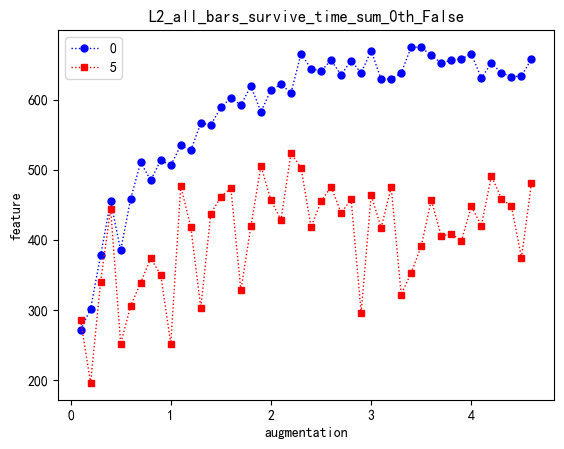

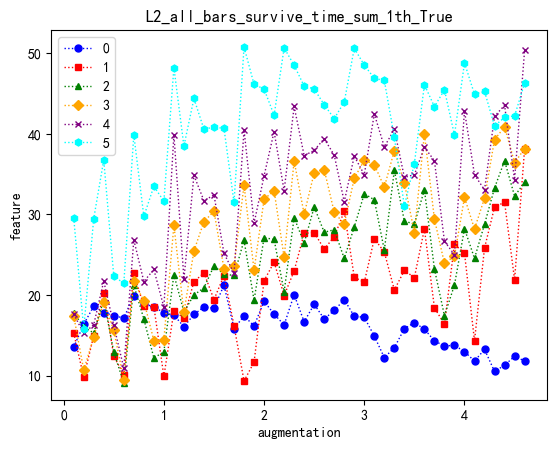

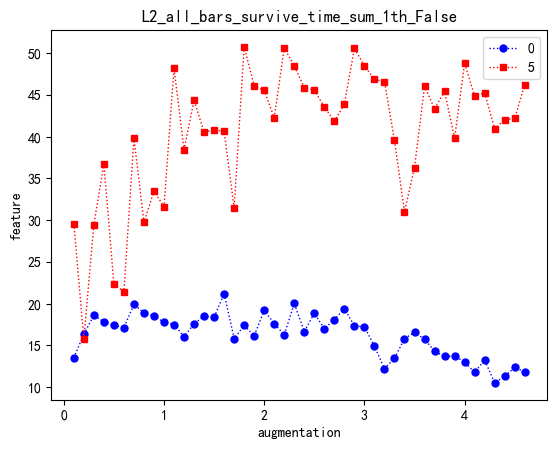

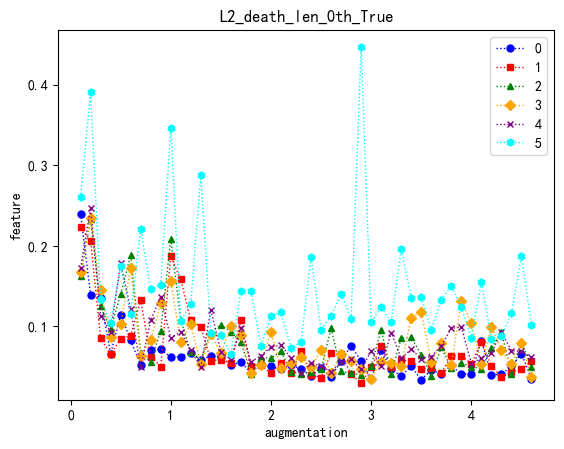

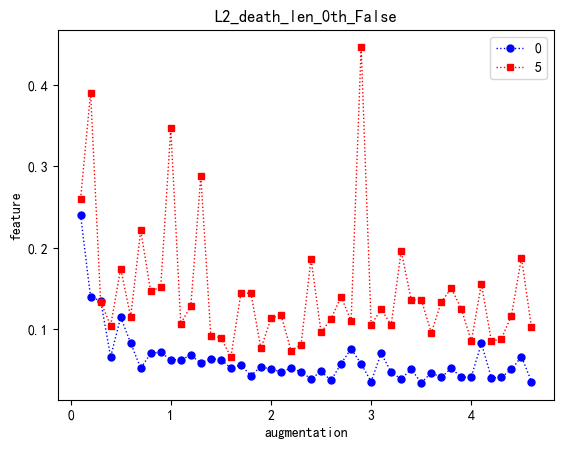

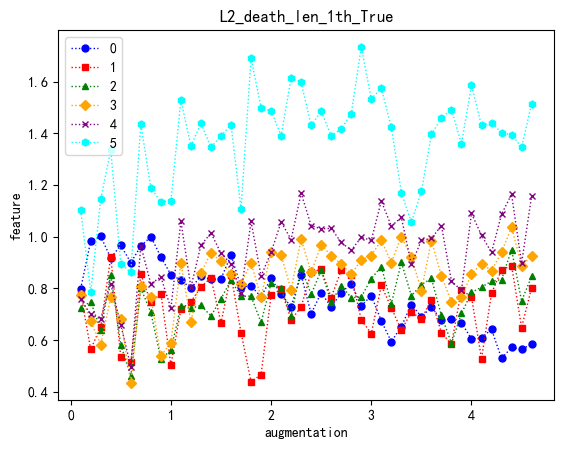

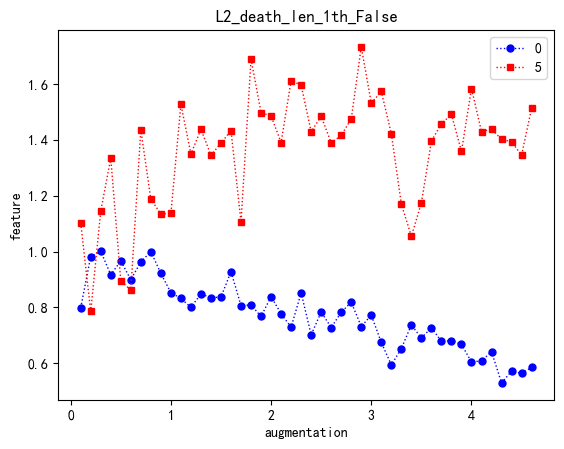

In [22]:
folder = r".\test_rescale_1207\scale_albumentation\LeNet"  # 替换为实际文件夹路径，这里是保存路径
pkl_filename = 'betti_features.pkl'  # 替换为实际的 pkl 文件名

# 创建CompareFeatureCared类的实例，并对每个组合进行操作
for combination in combinations:
    comp = CompareFeatureCared(folder, pkl_filename, *combination, aug_type="scale")

# test_val_acc = CompareValAcc(file_path=folder, target_pkl="best_test_acc.pkl")
# test_BOF = CompareBOF(file_path=folder, target_pkl="BOF.pkl", aug_name='angle', net_name='LeNet')